In [92]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss,roc_auc_score,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import f1_score, recall_score, classification_report
from sklearn.metrics import fbeta_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from itertools import cycle
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model

In [91]:
!pip install xgboost

In [54]:
DATA_PATH  = "C:/Users/q843377/desktop/raj/rajeev/oms/GT Practicum KMAS Data/"

In [179]:
data_old = pd.read_csv(DATA_PATH+'/features.csv')
data_old.head()

data = pd.read_csv(DATA_PATH+'/features1.csv')
data.head()

,student.studentNumber,State Student ID,Birth Date,Gender,Salesforce ID,Full Name,KIPP HS Class,Enrollment: Status,Currently Enrolled School,College Graduated From,...,salesforce_student_id,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,date_taken,ACT_taken,ACT_per,percent_abc
0,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
1,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
2,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
3,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
4,1069072,1.027898e+09,01-02-2001,F,003C000001mmOWjIAM,NaN,2019.0,Graduated,Arizona State University,NaN,...,003C000001mmOWjIAM,18.0,23.0,19.0,19.0,20.0,2018-04-15,Y,Satisfactory,0.960463


In [180]:
data.columns

Index(['student.studentNumber', 'State Student ID', 'Birth Date', 'Gender',
       'Salesforce ID', 'Full Name', 'KIPP HS Class', 'Enrollment: Status',
       'Currently Enrolled School', 'College Graduated From',
       'Enlisted in Military', 'Military Status', 'student.stateID',
       'student.gender', 'student.grade', 'student.birthdate',
       'student.hispanicEthnicity', 'student.raceEthnicityFed',
       'histEnrollment.specialEdStatus', 'histEnrollment.lep', 'age',
       'Years_Enrolled', 'salesforce_student_id', 'ACT_Math__c',
       'ACT_English__c', 'ACT_Reading__c', 'ACT_Science__c',
       'ACT_Composite__c', 'date_taken', 'ACT_taken', 'ACT_per',
       'percent_abc'],
      dtype='object')

In [181]:
data['success'] = 'na'



data.loc[(data['Enrollment: Status'].isin( ['Attending','Graduated']), 'success')] = 'Success'
data.loc[(data['Enrollment: Status'].isin( ['Did Not Enroll','Expelled','Leave of Absence','Special Circumstance','Transferred out','Unknown','Withdrawn']), 'success')] = 'Failure'


student_data = data.drop(['State Student ID'],axis=1);
student_data = student_data.drop(['Birth Date'],axis=1);
student_data = student_data.drop(['student.studentNumber'],axis=1);
#student_data = student_data.drop(['Birth Date'],axis=1);
student_data = student_data.drop(['Salesforce ID'],axis=1);
student_data = student_data.drop(['Full Name', 'KIPP HS Class'],axis=1);
student_data = student_data.drop(['Currently Enrolled School', 'College Graduated From','Enlisted in Military', 'Military Status', 'student.stateID',],axis=1);
student_data = student_data.drop(['Gender'],axis=1);
student_data = student_data.drop(['student.birthdate','student.hispanicEthnicity', 'student.raceEthnicityFed','histEnrollment.specialEdStatus', 'histEnrollment.lep'],axis=1);
student_data = student_data.drop(['salesforce_student_id'],axis=1);
student_data = student_data.drop(['date_taken'],axis=1);
student_data = student_data.drop(['Enrollment: Status'],axis=1);
display(student_data)

,student.gender,student.grade,age,Years_Enrolled,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,ACT_taken,ACT_per,percent_abc,success
0,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,Good,0.919715,Success
1,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,Good,0.919715,Success
2,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,Good,0.919715,Success
3,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,Good,0.919715,Success
4,F,12,19,7,18.0,23.0,19.0,19.0,20.0,Y,Satisfactory,0.960463,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,Satisfactory,0.952029,Success
824,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,Satisfactory,0.952029,Success
825,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,Satisfactory,0.952029,Success
826,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,Satisfactory,0.952029,Success


In [182]:
display(student_data)

,student.gender,student.grade,age,Years_Enrolled,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,ACT_taken,ACT_per,percent_abc,success
0,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,Good,0.919715,Success
1,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,Good,0.919715,Success
2,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,Good,0.919715,Success
3,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,Good,0.919715,Success
4,F,12,19,7,18.0,23.0,19.0,19.0,20.0,Y,Satisfactory,0.960463,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,Satisfactory,0.952029,Success
824,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,Satisfactory,0.952029,Success
825,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,Satisfactory,0.952029,Success
826,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,Satisfactory,0.952029,Success


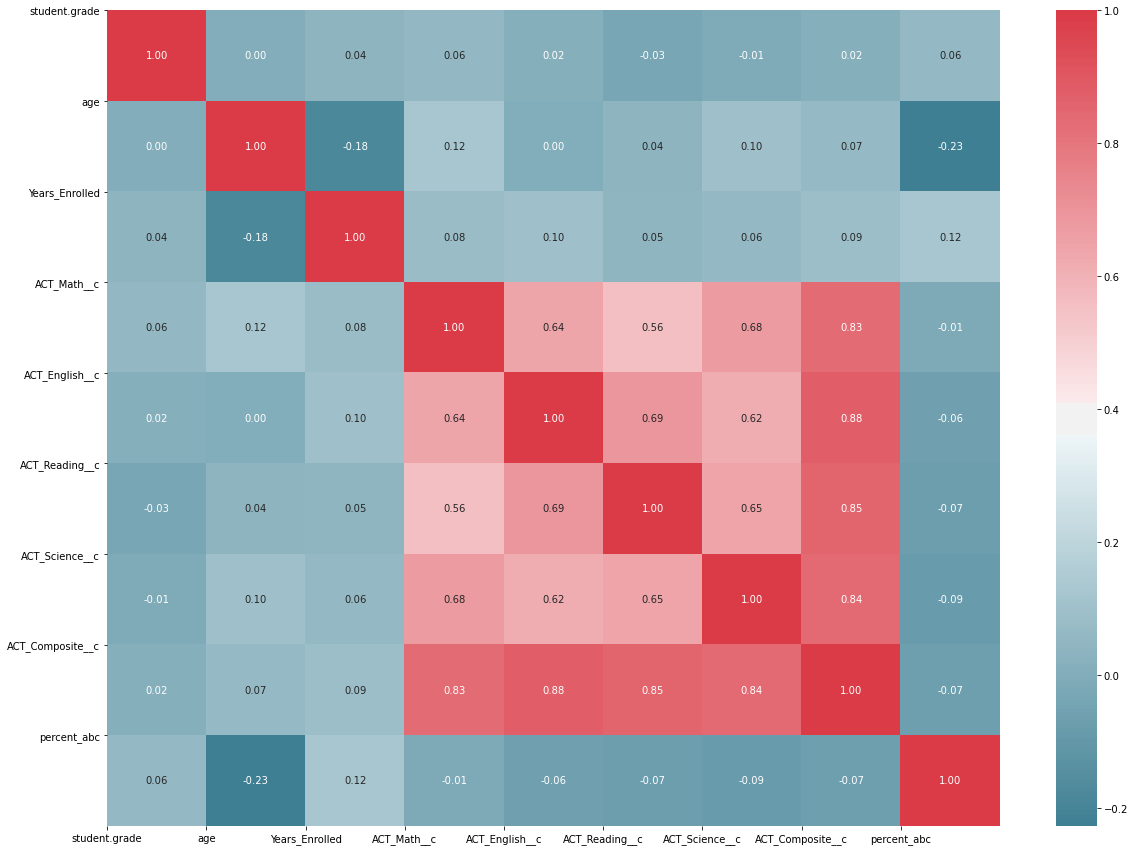

In [183]:

def correlation(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.savefig('Correlation.png', bbox_inches='tight')
    plt.show()


# In[294]:


correlation(student_data)


In [184]:

train=student_data
lb=LabelEncoder()
lb.fit(train['success'])
train['success']=lb.transform(train['success'])
train = pd.get_dummies(train)

In [185]:
y=train[['success']]

train = train.drop(['success'],axis=1);


In [186]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train,y,random_state=0)

In [187]:
y_train.shape

(621, 1)

In [188]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error,log_loss,roc_auc_score,accuracy_score,confusion_matrix
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
y_predict=lr.predict_proba(x_val)

C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [189]:
log_loss(y_val,y_predict)

0.3822642840656417

In [190]:
accuracy_score(y_val,y_pred)

0.8743961352657005

In [191]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_val)


C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [192]:
accuracy_score(y_val,y_pred)

0.8695652173913043

In [193]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

forest = RandomForestClassifier(n_estimators=200, min_samples_leaf=3)
f = forest.fit(x_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(x_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(x_val, y_val))

C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Raondom Forest Model Score : 0.9098228663446055 , Cross Validation Score : 0.8743961352657005


In [194]:
accuracy_score(y_val,y_pred)

0.8695652173913043

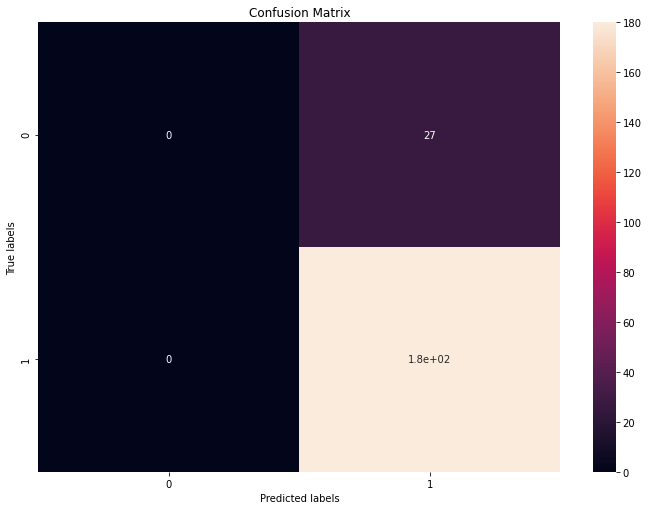

In [196]:
labels = list(range(0,5))
import seaborn as sns    
cm=confusion_matrix(y_val,y_pred)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [197]:
model = XGBClassifier()
model=XGBClassifier(learning_rate=0.1,n_estimators=100)
# kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

# for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
#       X_train, X_test = x_train[train_index], x_val[test_index] 
#       y_train, y_test = y_train[train_index], y_val[test_index]

# kfold = StratifiedKFold(y_train, n_folds=3, shuffle=True, random_state=7)
# for traincv,testcv in kfold:
model.fit(x_train,y_train)

C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [198]:
y_pred=model.predict(x_val)

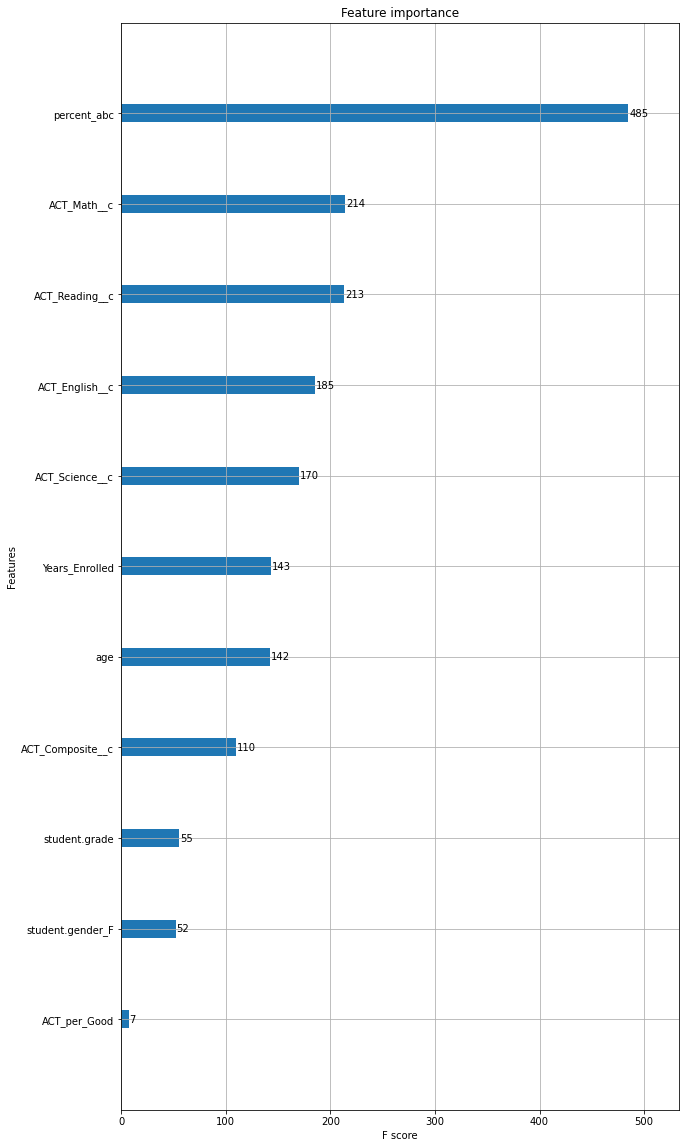

In [199]:
from xgboost import plot_importance
# plot feature importance
fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(model, ax=ax)

plt.show()

In [200]:
from sklearn.model_selection import KFold # import KFold
X = x_train
y = y_train
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=10, random_state=None, shuffle=False)

In [201]:
model = XGBClassifier()
model=XGBClassifier(learning_rate=0.1,n_estimators=100)
#k-fold cross validation
from sklearn.model_selection import cross_val_score
clf = model
cross_val_score(clf,x_train, y_train, cv=kf, n_jobs=1)

C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.82539683, 0.83870968, 0.87096774, 0.85483871, 0.87096774,
       0.83870968, 0.91935484, 0.90322581, 0.93548387, 0.85483871])

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


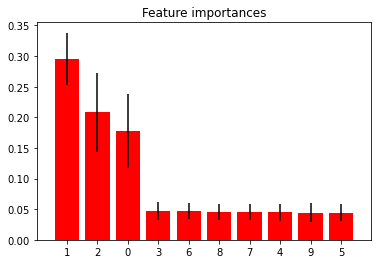

In [202]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [203]:
y.shape

(1000,)

In [204]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error,log_loss,roc_auc_score,accuracy_score,confusion_matrix
lr=LogisticRegression(max_iter = 600)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
y_predict=lr.predict_proba(x_val)

C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [205]:
log_loss(y_val,y_predict)

0.3850665421145384

In [206]:
accuracy_score(y_val,y_pred)

0.8743961352657005

In [207]:
confusion_matrix(y_val,y_pred)

array([[  1,  26],
       [  0, 180]], dtype=int64)

In [208]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_val)


C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [209]:
accuracy_score(y_val,y_pred)

0.8695652173913043

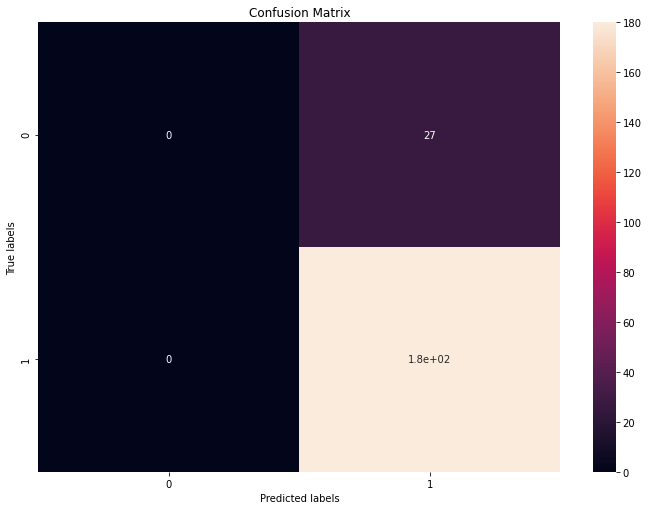

In [210]:
labels = list(range(0,24))
import seaborn as sns    
cm=confusion_matrix(y_val,y_pred)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [211]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

total = lambda x : x.sum()/5
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('percentage of sensitivity = '+str(total(TPR)*100))

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('percentage of precision = '+str(total(PPV)*100))
# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy percentage = '+str(total(ACC)*100))

percentage of sensitivity = 20.0
percentage of precision = nan
Accuracy percentage = 34.78260869565217


C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


In [212]:
cm

array([[  0,  27],
       [  0, 180]], dtype=int64)

In [213]:
y_val['success'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1])

In [161]:
y_pred.

(207,)